## Pandas 数据分析连续（第二部分）


<font color = red>注意：代码的输出，是我用标准答案run好的，不要run题目的chunk，输出会消失！另开一个代码块输入你的答案！！！</font>

## 抽样

In [1]:
# 创建随机数df

import pandas as pd
import numpy as np

df = pd.read_csv('./Iris.csv')

In [2]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 简单抽样

In [3]:
# 随机抽取五行
df.sample(n=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
101,102,5.8,2.7,5.1,1.9,Iris-virginica
11,12,4.8,3.4,1.6,0.2,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa
51,52,6.4,3.2,4.5,1.5,Iris-versicolor


In [4]:
# 每一次run这一chunk，都不会变
df.sample(n=5,random_state = 1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,15,5.8,4.0,1.2,0.2,Iris-setosa
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
16,17,5.4,3.9,1.3,0.4,Iris-setosa
131,132,7.9,3.8,6.4,2.0,Iris-virginica


In [5]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# 加权抽样
sample = df.sample(n = 20,weights = [20]*50+[50]*50+[30]*50,random_state=1024)
sample

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
149,150,5.9,3.0,5.1,1.8,Iris-virginica
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
108,109,6.7,2.5,5.8,1.8,Iris-virginica
34,35,4.9,3.1,1.5,0.1,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
37,38,4.9,3.1,1.5,0.1,Iris-setosa
99,100,5.7,2.8,4.1,1.3,Iris-versicolor


In [8]:
sample.Species.value_counts()

Iris-versicolor    9
Iris-virginica     6
Iris-setosa        5
Name: Species, dtype: int64

`value_counts()` 可以统计categorical数据的对应类别的size
常用指数：⭐⭐⭐

In [9]:
sample.Species.value_counts()/sample.shape[0] # 求百分比

Iris-versicolor    0.45
Iris-virginica     0.30
Iris-setosa        0.25
Name: Species, dtype: float64

如何更直观的看它们的分布呢？

<AxesSubplot:title={'center':'count - Species'}>

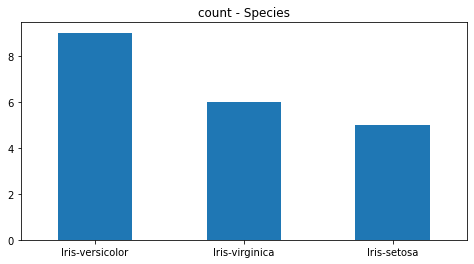

In [10]:
sample.Species.value_counts().plot(kind = 'bar', 
                                   title = 'count - Species',
                                   rot = 0,
                                   figsize = [8,4])

<div class="alert alert-block alert-success"><b>Step 1</b>: 
<font color = red>第一题：df这个数据行太多了，我们用不到，所以在每一类别里，随机抽选5条样本吧！seed = 1</font>


1. df新增一列，命名为`Species_encoding`，当Species为setosa，则值为1，versicolor，则值为2，virginica，值为3（不能用if elif）【2分】
2. 根据每个`Species`进行抽样，在每一类别里，随机抽选5条样本，命名为`iris_sample`。【3分】
</div>


In [11]:
# 不要run，在下面的代码块写答案

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoding
0,27,28,5.2,3.5,1.5,0.2,Iris-setosa,1
1,35,36,5.0,3.2,1.2,0.2,Iris-setosa,1
2,40,41,5.0,3.5,1.3,0.3,Iris-setosa,1
3,38,39,4.4,3.0,1.3,0.2,Iris-setosa,1
4,2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
5,77,78,6.7,3.0,5.0,1.7,Iris-versicolor,2
6,85,86,6.0,3.4,4.5,1.6,Iris-versicolor,2
7,90,91,5.5,2.6,4.4,1.2,Iris-versicolor,2
8,88,89,5.6,3.0,4.1,1.3,Iris-versicolor,2
9,52,53,6.9,3.1,4.9,1.5,Iris-versicolor,2


## 分组【groupby】上

那么如何根据类别对数据分组？

groupby函数可以帮我们解决问题！

什么是groupby? 可以总结为3个步骤：

1. Splitting 

根据分组标准，把数据拆分。


2. Applying

分组之后，目的是通过

 - 聚合函数
 - 转换函数
 - 筛选函数
 
对组内数据进行操作（有实例）
 
3. Combining


今天这一期，我们只讲【Splitting】的部分！

<div class="alert alert-block alert-warning">
<b>注意：</b>
没有完成上一题目，无法向下进行哦，请务必完成上题，得到 iris_sample
</div> 

In [12]:
iris_sample.groupby('Species')  # 会得到一个DataFrameGroupBy对象

In [13]:
sample_group = iris_sample.groupby('Species') 

In [14]:
list(sample_group) # 用list查看

[('Iris-setosa',
     index  Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
  0     27  28            5.2           3.5            1.5           0.2   
  1     35  36            5.0           3.2            1.2           0.2   
  2     40  41            5.0           3.5            1.3           0.3   
  3     38  39            4.4           3.0            1.3           0.2   
  4      2   3            4.7           3.2            1.3           0.2   
  
         Species  Species_encoding  
  0  Iris-setosa                 1  
  1  Iris-setosa                 1  
  2  Iris-setosa                 1  
  3  Iris-setosa                 1  
  4  Iris-setosa                 1  ),
 ('Iris-versicolor',
     index  Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
  5     77  78            6.7           3.0            5.0           1.7   
  6     85  86            6.0           3.4            4.5           1.6   
  7     90  91            5.5           2.6        

In [15]:
# .ngroups 查看有几组
sample_group.ngroups

3

In [16]:
# .size() 查看组内容量
sample_group.size()

Species
Iris-setosa        5
Iris-versicolor    5
Iris-virginica     5
dtype: int64

<div class="alert alert-block alert-success"><b>Step 2</b>: 

第二题：基于`sample_group`


1. 返回一个df，叫first，为每个group的第一行数据合并【1分】
2. 返回一个df，叫last，为每个group的最后一行数据合并 【1分】
</div>

In [17]:
# first

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoding
Species,,,,,,,
Iris-setosa,27,28,5.2,3.5,1.5,0.2,1
Iris-versicolor,77,78,6.7,3.0,5.0,1.7,2
Iris-virginica,127,128,6.1,3.0,4.9,1.8,3


In [18]:
# last

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoding
Species,,,,,,,
Iris-setosa,2,3,4.7,3.2,1.3,0.2,1
Iris-versicolor,52,53,6.9,3.1,4.9,1.5,2
Iris-virginica,102,103,7.1,3.0,5.9,2.1,3


In [19]:
# 根据分组的名称取出对应数据
sample_group.get_group('Iris-setosa')

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoding
0,27,28,5.2,3.5,1.5,0.2,Iris-setosa,1
1,35,36,5.0,3.2,1.2,0.2,Iris-setosa,1
2,40,41,5.0,3.5,1.3,0.3,Iris-setosa,1
3,38,39,4.4,3.0,1.3,0.2,Iris-setosa,1
4,2,3,4.7,3.2,1.3,0.2,Iris-setosa,1


<div class="alert alert-block alert-success"><b>Step 3</b>: 

第三题：基于`sample_group`【提示：filter】


请问那组数据的`SepalWidthCm`的最大值大于3.2，并且`PetalWidthCm`的最小值小于1【2分】

</div>

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoding
0,27,28,5.2,3.5,1.5,0.2,Iris-setosa,1
1,35,36,5.0,3.2,1.2,0.2,Iris-setosa,1
2,40,41,5.0,3.5,1.3,0.3,Iris-setosa,1
3,38,39,4.4,3.0,1.3,0.2,Iris-setosa,1
4,2,3,4.7,3.2,1.3,0.2,Iris-setosa,1


## 小结

今天就分享到这里，总结一下！

1. 抽样以及具体参数用法
2. groupby的Splitting以及group的基本manipulation